# Engineering Data Analysis

> **Mohamad M. Hallal, PhD** <br> Teaching Professor, UC Berkeley

[![License](https://img.shields.io/badge/license-CC%20BY--NC--ND%204.0-blue)](https://creativecommons.org/licenses/by-nc-nd/4.0/)
***

# Common Discrete Distributions

In this notebook, we will explore common discrete distributions and learn how to use them with the `scipy.stats` library. Discrete distributions are used to model scenarios where outcomes are distinct and countable. The `scipy.stats` library has built-in methods that can be used to directly obtain the probability mass function (PMF), cumulative distribution function (CDF), mean, variance, and more of any common distribution. However, it is **very important** to understand the inputs to these distributions in Python, as they might differ from what we discussed in class.

Let's get started!

# Bernoulli Distribution

The Bernoulli distribution is the simplest discrete distribution, representing a single trial with two possible outcomes: success (1) or failure (0). It is characterized by a single parameter, $p$, which is the probability of success.

| Distribution      | Python function |
|:------------------|:----------------|
| Bernoulli         | [`bernoulli(p)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli) |

# Binomial Distribution

The Binomial distribution generalizes the Bernoulli distribution to multiple trials. It represents the number of successes in $n$ independent Bernoulli trials, each with probability $p$ of success.

| Distribution      | Python function |
|:------------------|:----------------|
| Binomial          | [`binom(n, p)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom) |

Each distribution has built-in methods to directly calculate summary statistics, PMF, CDF, and even obtain a random sample. Below is a table summarizing some common methods available for discrete distributions in `scipy.stats`:

| Method     | Description                                    | General Example    | Bernoulli Example                  |
|:-----------|:-----------------------------------------------|:-------------------|:-----------------------------------|
| `pmf()`    | Computes the PMF at specific value(s)          | `dist.pmf(k)`      | `bernoulli.pmf(p=0.5, k=0)`        |
| `cdf()`    | Computes the CDF at specific value(s)          | `dist.cdf(k)`      | `bernoulli.cdf(p=0.5, k=range(2))` |
| `mean()`   | Computes the expected value                    | `dist.mean()`      | `bernoulli.mean(p=0.5)`            |
| `median()` | Computes the median                            | `dist.median()`    | `bernoulli.median(p=0.5)`          |
| `var()`    | Computes the variance                          | `dist.var()`       | `bernoulli.var(p=0.5)`             |
| `std()`    | Computes the standard deviation                | `dist.std()`       | `bernoulli.std(p=0.5)`             |
| `rvs()`    | Generates random samples from the distribution | `dist.rvs(size=n)` | `bernoulli.rvs(p=0.5, size=10)`    |

<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Compute the mean and standard deviation of a Binomial distribution with 3 trials $p= 0.8$.</div> 

In [1]:
from scipy.stats import binom

# compute mean
mean = binom.mean(n=3, p=0.8)
print(f'Mean: {mean:.2f}')

Mean: 2.40


In [3]:
# compute standard deviation
stdev = binom.std(n=3, p=0.8)
print(f'Standard deviation: {stdev:.2f}')

Standard deviation: 0.69


<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Run the code below to compare the above mean and standard deviation to those obtained from the duck sampling activity.</div> 

In [5]:
import pandas as pd

# Define path to data and their gid
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ2fUKXMhPV62PJbqbEC8Dx2cQ0r7DmCBCpLv-j18s0pt91Xr_VmbiIsRSr_uiiPmtHeTBE9LEgUU6A/pub?output=csv&gid="
gids = [0, 256169159, 1309475386, 1766258035, 1993533243, 629036200, 1471433991, 1243754353, 1081653691, 1551041451, 1962198564, 502609536, 1908262079,
        296536638, 11798463, 2073400276, 1086870903, 1160920316, 788098645, 1587255657, 682312113, 1718069535, 1389110583, 1856898227, 1288189134]

# Create an empty DataFrame with column names
all_samples = pd.DataFrame(columns=['X'])

# Loop over all sheets
for gid in gids:
    df = pd.read_csv(f'{url}{gid}', nrows=30)
    
    # Concatenate the DataFrames vertically (along rows)
    all_samples = pd.concat([all_samples, df[['X']].dropna()], ignore_index=True)

all_samples = all_samples['X']

# Mean of all groups
print(f'Mean of All Groups: {round(all_samples.mean(),3)}')

# Standard deviation of all groups
print(f'Standard Deviation of All Groups: {round(all_samples.std(), 3)}')

Mean of All Groups: 2.394
Standard Deviation of All Groups: 0.693


<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Compute and plot the PMF of a Binomial distribution with 3 trials $p= 0.8$ and compare it to the PMF obtained by all groups.</div> 

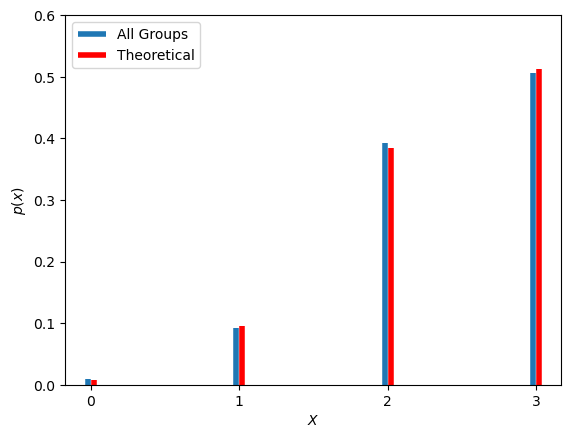

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# x values
x = np.arange(4)

# Get PMF based on all groups
proportion_array = np.array([np.mean(all_samples == val) for val in x])
plt.vlines(x-0.02, 0, proportion_array, linewidth=4, label='All Groups')

# Get theoretical PMF
PMF = binom.pmf(n=3, p=0.8, k=x)
plt.vlines(x+0.02, 0, PMF, linewidth=4, color='r', label='Theoretical')

# Add legend
plt.legend(loc='upper left')

# label the axes
plt.xlabel('$X$')
plt.ylabel('$p(x)$')

# control the axes
plt.ylim(0, 0.6)
plt.xticks(x)

plt.show()

These are only some of the common discrete distributions. You will explore other common discrete distributions in the lab.